# Initial Thoughts

So the Aim of this project is to explore Boston House Prices data set to use ML techniques for prediction.

This is the *[ Boston House Prices Dataset](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)* on Kaggle.

# Rough Plan

# Rough Plan

## Data Collection & Investigation
- [x] Data Collection / import + investigate what we have

## Data Cleaning
- [x] Data Cleaning pt 1 (only dealing with NaN or zero values)

## Data Preparation
- [x] Train/Test split - Seperate our Xtrain Xtest and Ytrain Ytest

## Data Visualization
- [x] Data Visualization (look for patterns and further cleaning, outliers, fillin data possiblities)

## Advanced Data Cleaning
- [ ] Data Cleaning pt 2 (filling in data values or adjusting outliers) - Planned for Iteration

## Final Data Check
- [x] Data Visualization (final check are we happy with our clean data)

## Exploratory Analysis
- [x] Exploratory Analysis (Correlations, trying to decide on features)

## Feature Engineering
- [x] Feature engineering - decide on best features and/or make new features if needed

## Model Building
- [] Model building
  - [x] Set a baseline with liner regression
  - [x] And another Model for comparison

## Model Validation
- [x] Cross validate

## Model Iteration
- [x] Iterate on Model - try some different models or adjust features to see if we can get a better outcome

## Pipeline Creation
- [x] Pipeline - After our first setup we can then refactor some of our cleaning and feature engineering logic into a pipeline


# Imports

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display
import missingno as msno
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Assess Data 

Notes from Dataset Docs

1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [3]:
# Import CSV and check data structure.
df = pd.read_csv('./data/boston.csv')

display(df.head())
print(df.dtypes)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Axes(0.125,0.11;0.698618x0.77)


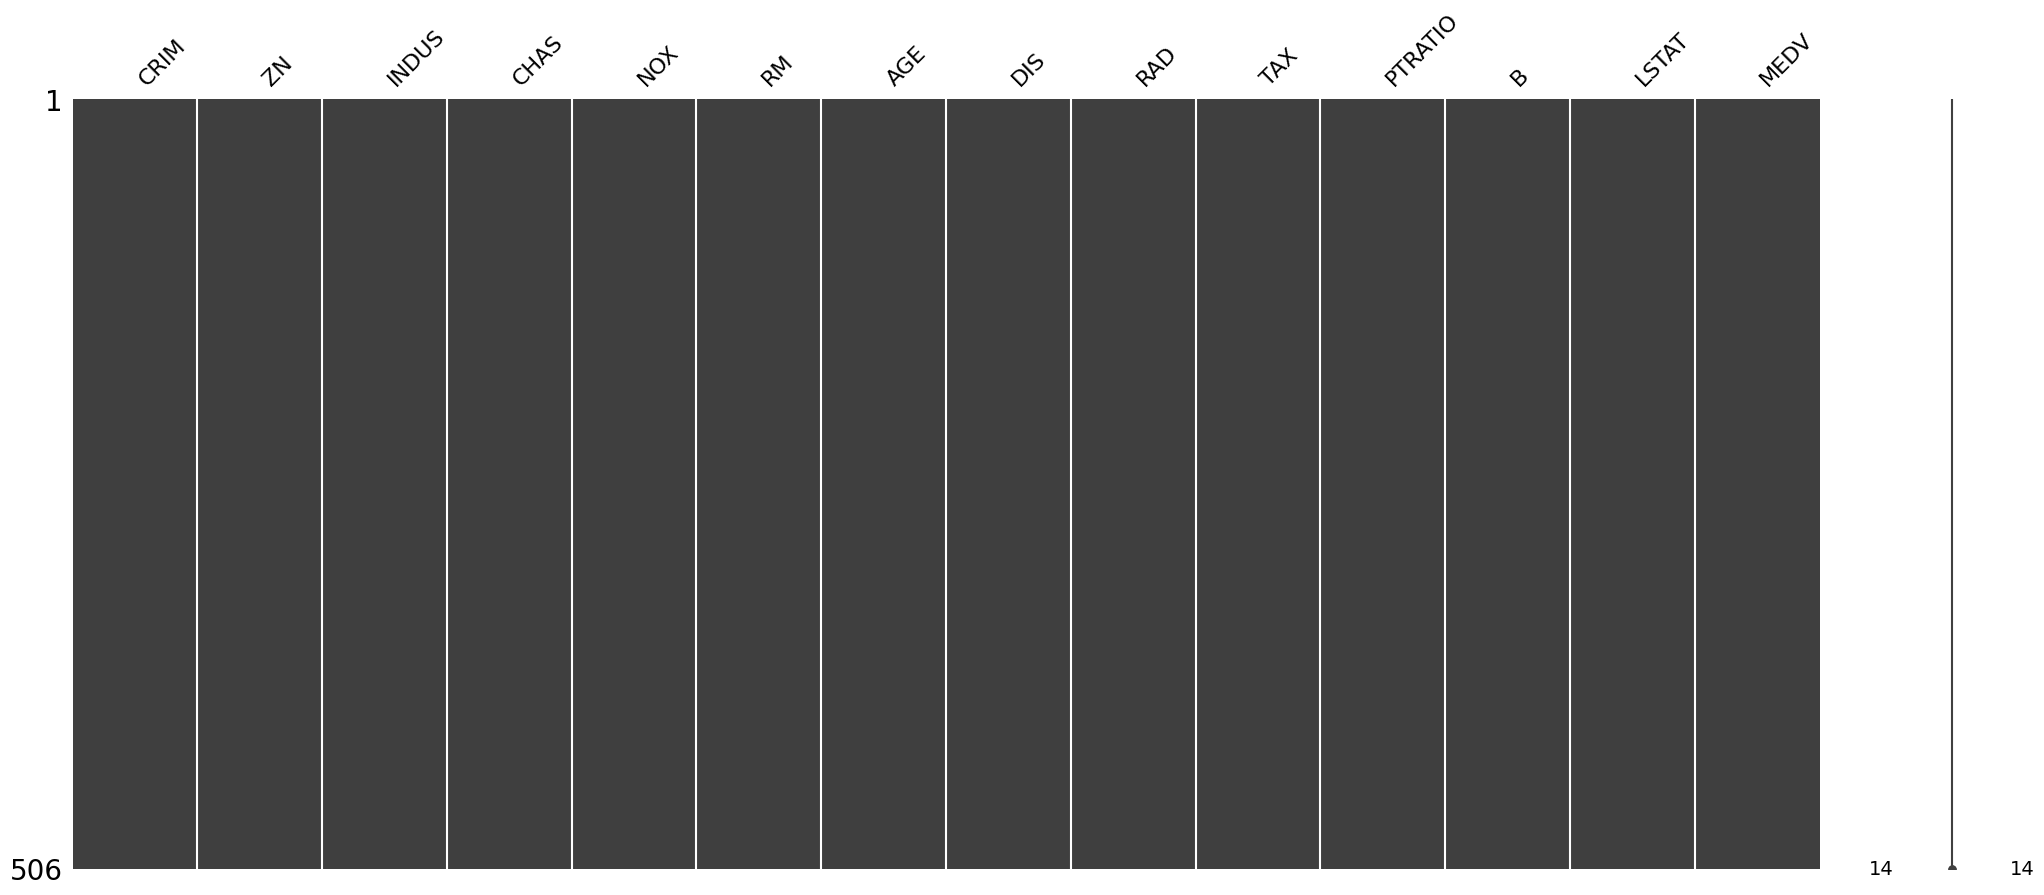

In [5]:
#Check if we have any null / NaN values.
print(msno.matrix(df))

Looks like the dataset is quite clean from Nan's.

In [6]:
print(df.duplicated().sum())
print(df.duplicated().unique())

# Check for negatives
print((df < 0).any())

0
[False]
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool


We also have no duplicates in our data, which is good.

In [7]:
print(df.shape)

# Check for nulls
print(df.loc[:, :].isnull().any())

# Count the nulls
print(df.loc[:, :].isnull().sum())

(506, 14)
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Lets just confirm there are not other null values. It seems good. I will also check for zeros since our values could be coded as those.

In [8]:
# columns with zeros
print(f"Total Columns with zeros: {(df == 0).any(axis=0).sum()}")
print((df == 0).any(axis=0))

# rows with zeros
print(f"Total Columns with zeros: {(df == 0).any(axis=1).sum()}")
print((df == 0).any(axis=1))

print(f"rows, cols: {df.shape}")

Total Columns with zeros: 2
CRIM       False
ZN          True
INDUS      False
CHAS        True
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool
Total Columns with zeros: 499
0      True
1      True
2      True
3      True
4      True
       ... 
501    True
502    True
503    True
504    True
505    True
Length: 506, dtype: bool
rows, cols: (506, 14)


Note: We expect Zeros on CHAS (as its a categorical data column). ZN is also feasible to be zeros since it relates to % of residential zoning, which maybe not be possible in all areas. I would then suspect that the datset is quite clean from empty values.

In [9]:
# Lets see exactly how many rows of zeros we have.
print(df.columns)
print((df['CHAS'] == 0).sum())
df_with_no_chas = df.drop("CHAS", axis=1)

print((df_with_no_chas == 0).any(axis=1).sum())

print((df_with_no_chas['ZN'] == 0).sum())


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
471
372
372


Lets see exactly how many rows of zeros we have and where they are coming from.


# Data Visualization - Plotting Distriubtions

 Let get an idea of how the columns (potentional features look in distribution in case it makes sense to transform any of them)

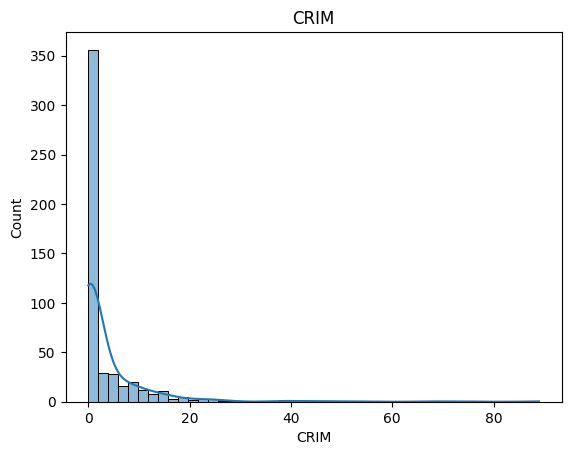

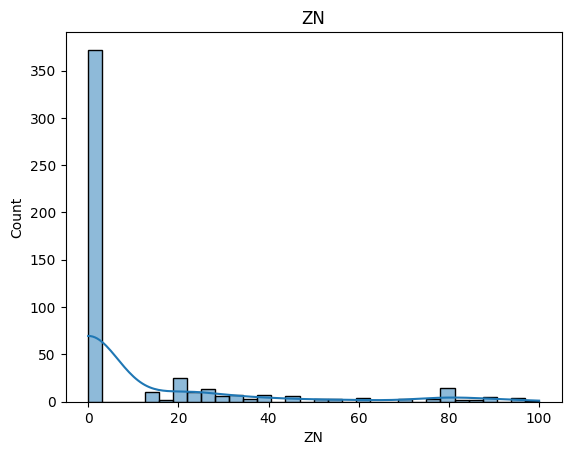

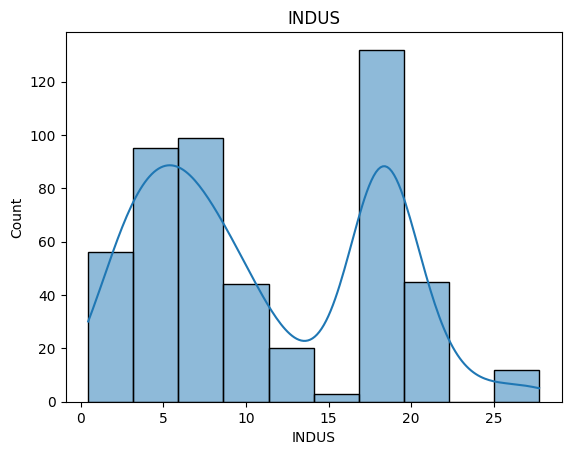

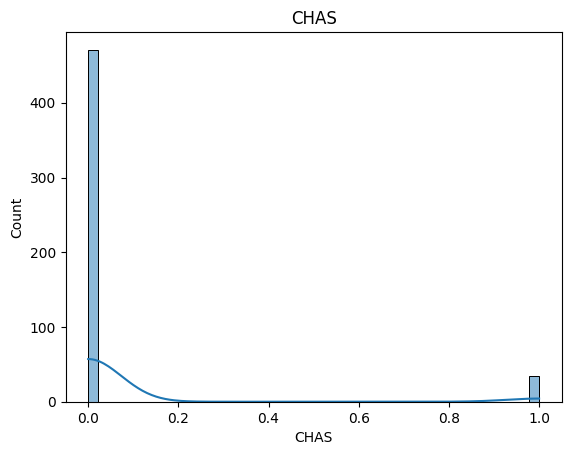

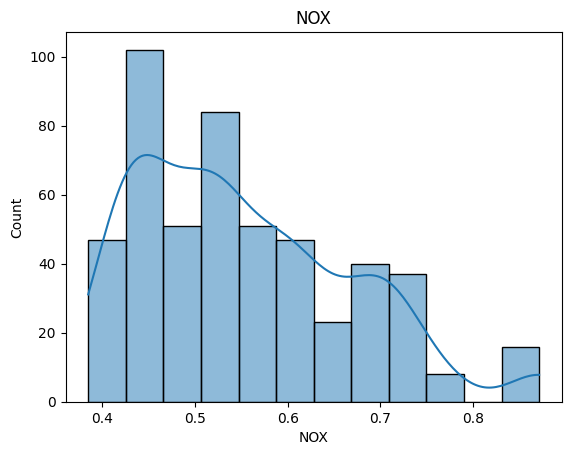

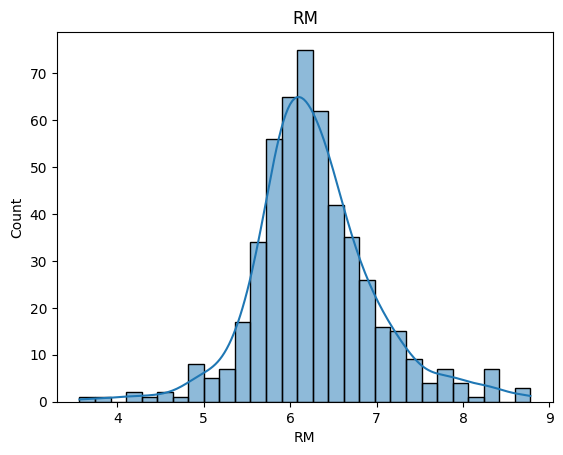

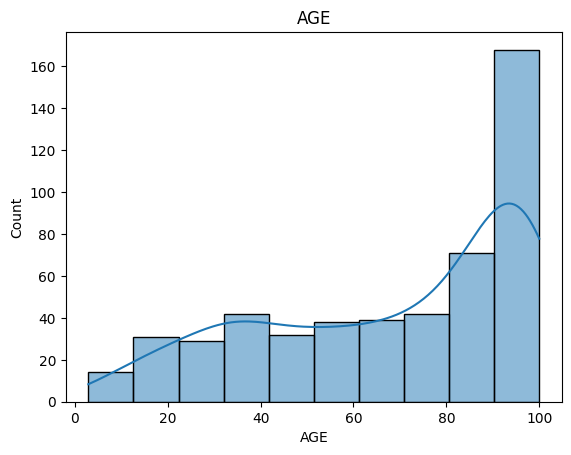

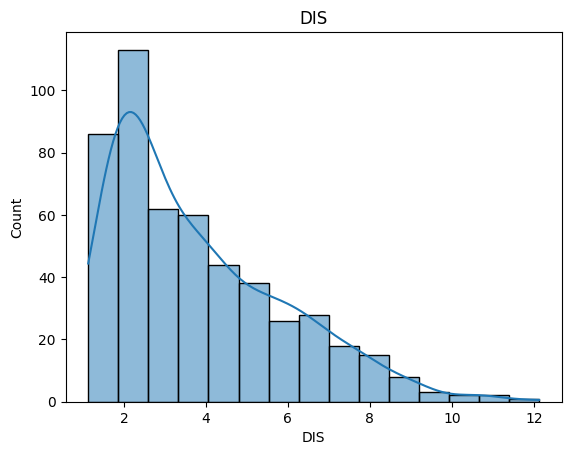

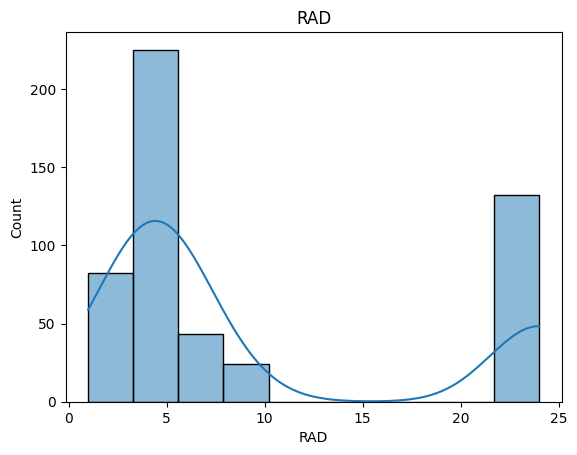

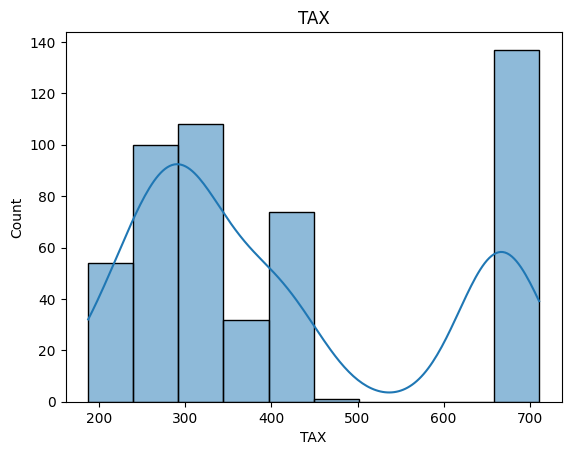

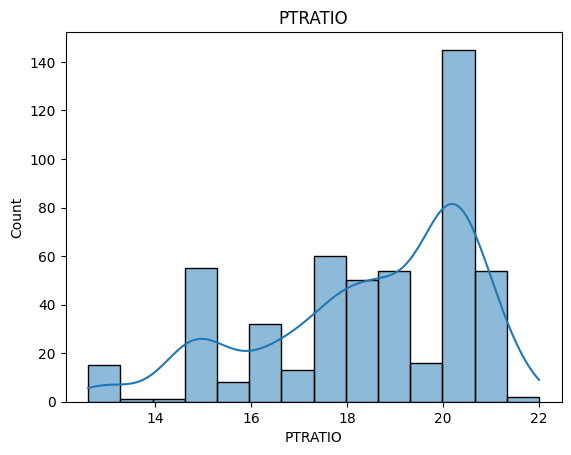

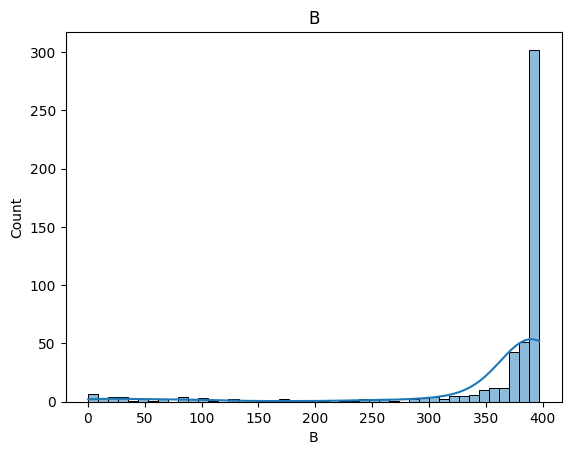

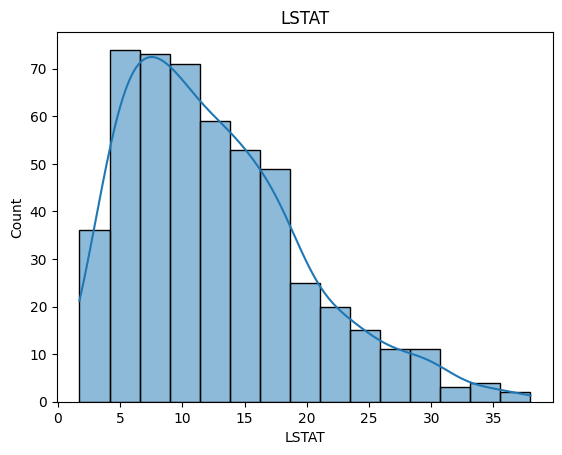

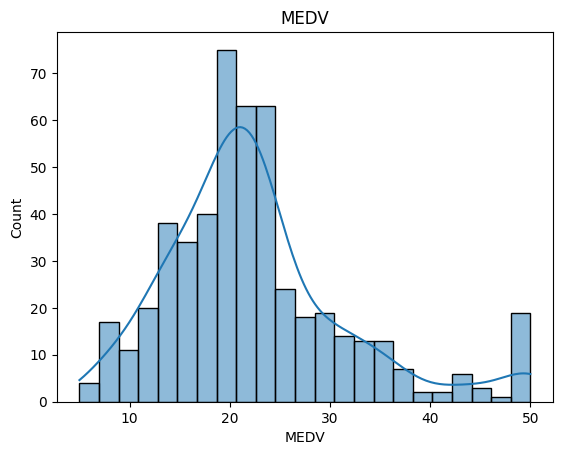

In [10]:
for  col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

It seems we have a fair amount distributions that are not guassian, something to bear in mind when we want to do feature engineering on our
Second Iteration. We might need to transform some of them...

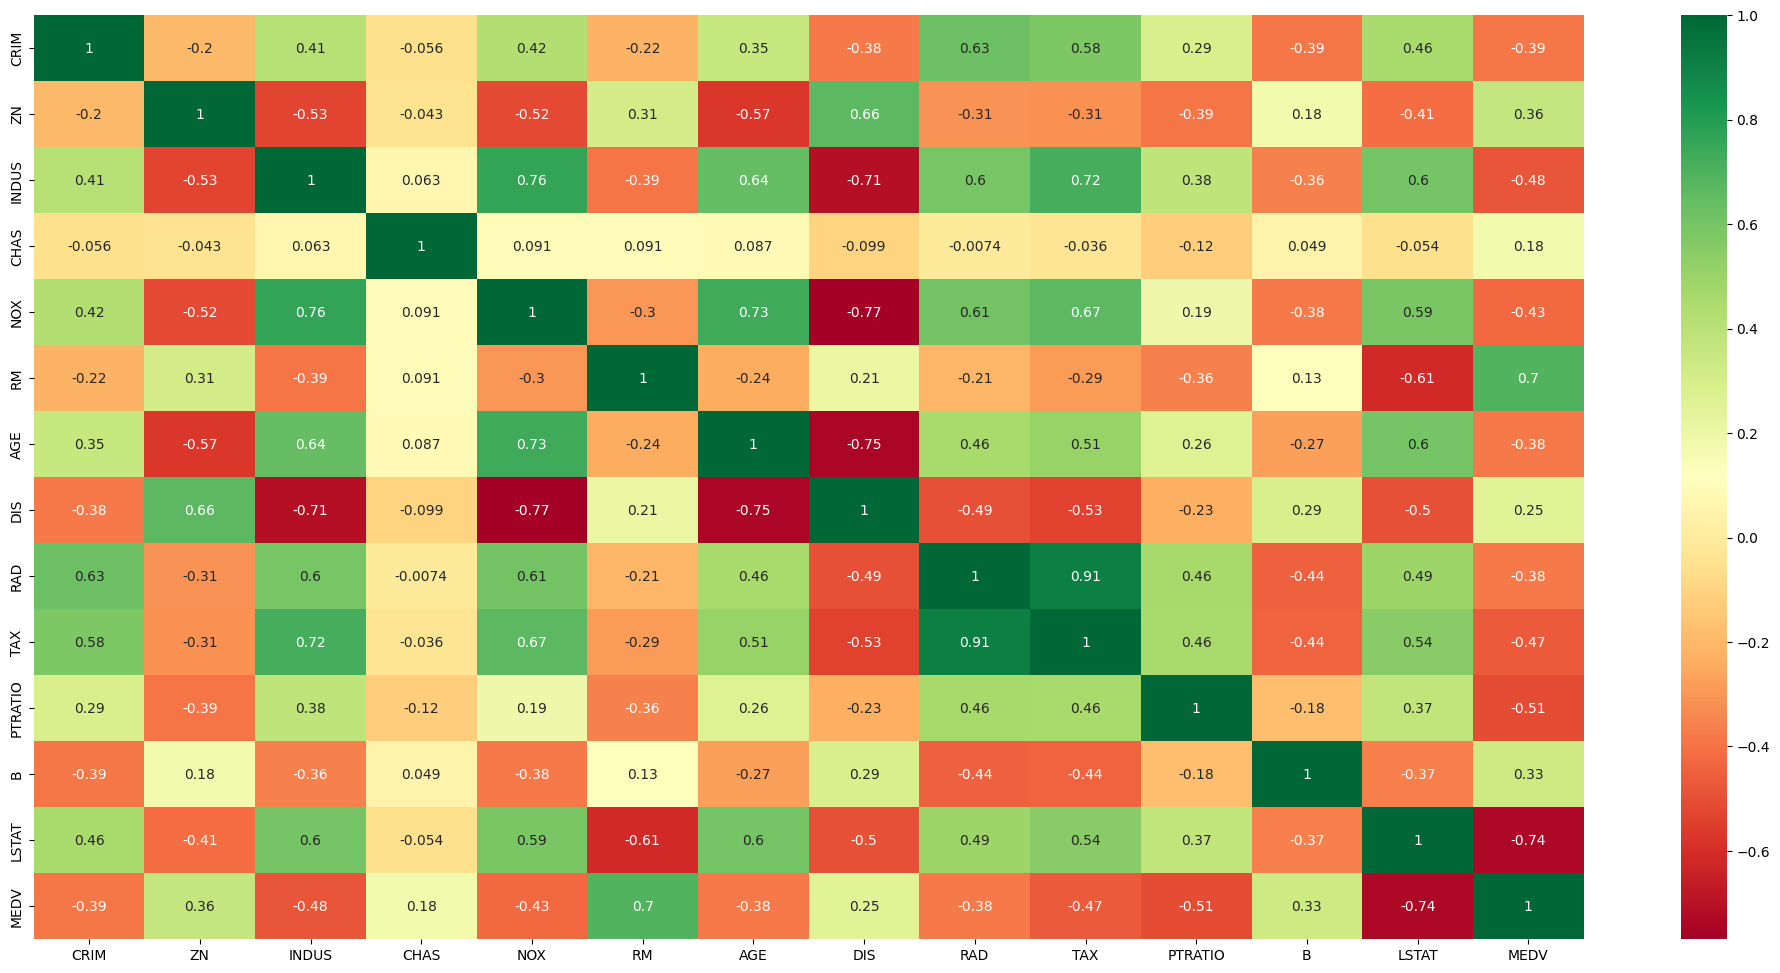

In [11]:
# Lets looks at a heatmap of different varibles to see whats highly correlated to MEDV

corrmat = df.corr()   # get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Features with the highest correlation:
## LSTAT, RM, PTRATIO, AGE

1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) **RM: average number of rooms per dwelling**
7) **AGE: proportion of owner-occupied units built prior to 1940**
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k] - **THIS WONT BE KNOWN WITHOUT KNOWING THE HOUSE PRICE. DROP THIS FOR DATA LEAKAGE REASONS**
12) **PTRATIO: pupil-teacher ratio by town**
13) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
14) **LSTAT: % lower status of the population**

# Our Baseline Model

Lets establish a baseline using all features and a linear regression so we can build on that with some some better feature engineering and different models afterwards.

In [12]:
y = df['MEDV']
X = df.drop("MEDV", axis=1)
X = X.drop("TAX", axis=1)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split our data set for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

l_preds = linear_model.predict(X_test)

print(f"Score: {linear_model.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, l_preds)}")


Score: 0.7271546947481666
MAE: 2.8135840379416064


Here we see our baseline is actually not that bad, and our MAE is only 2,8135 which given the Median House price is 506, 000 is good for a baseline.

Score: 0.8196587654546738
MAE: 2.926758161625978


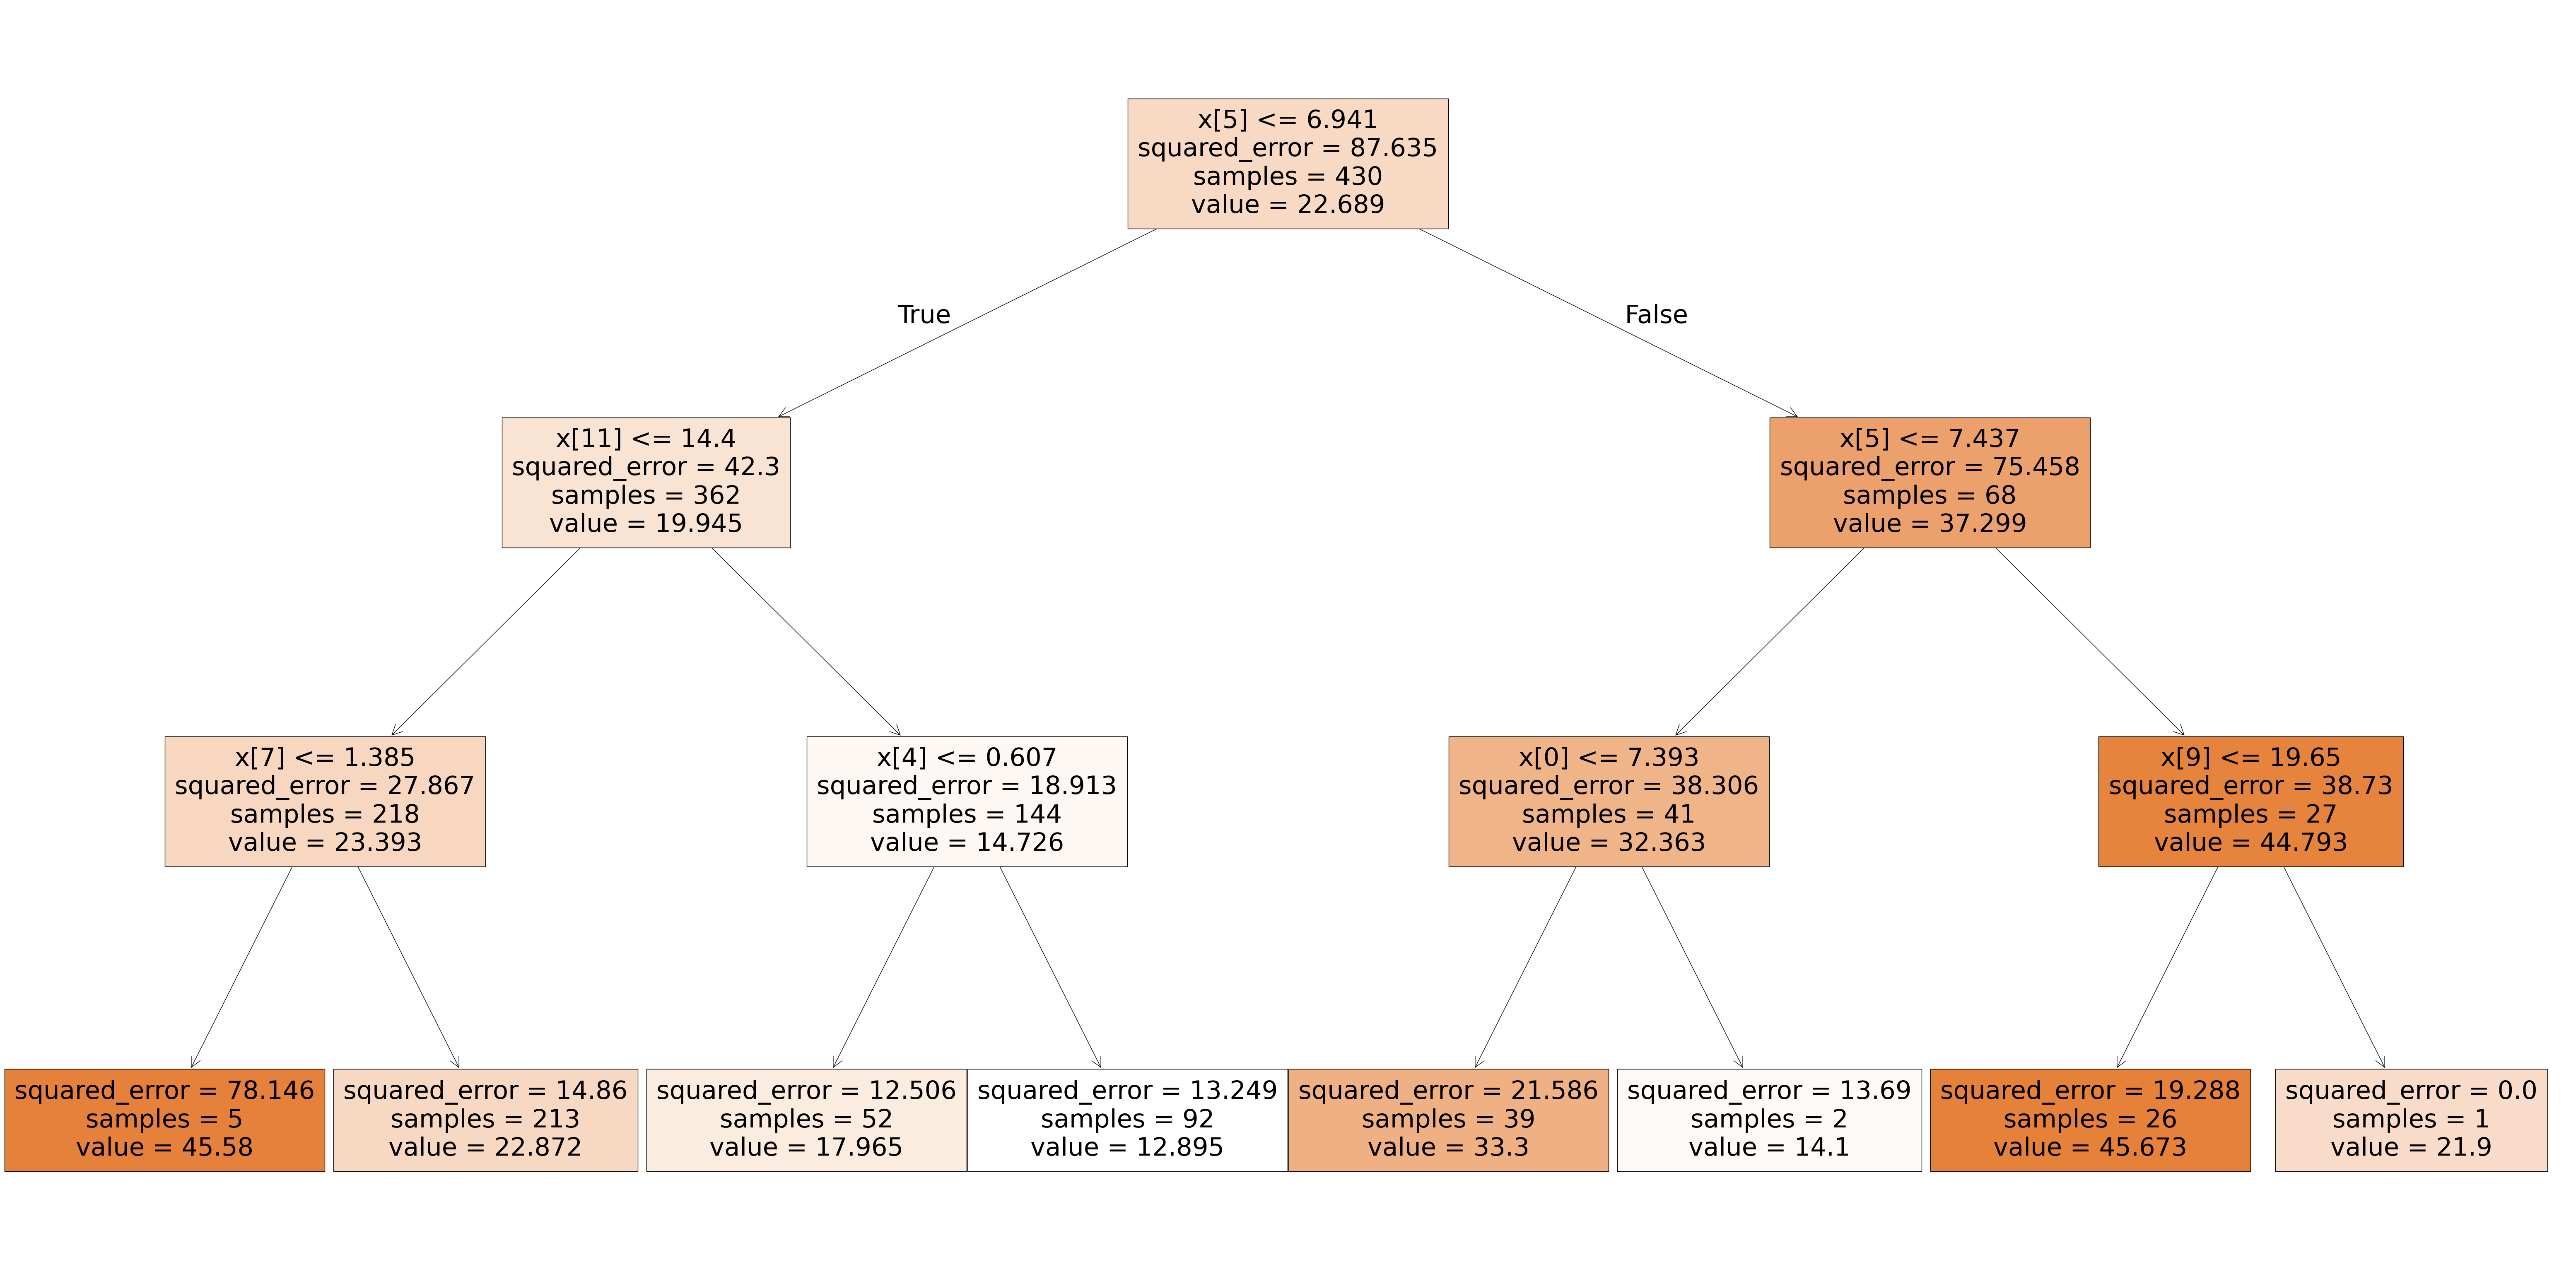

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import tree

dt_model = DecisionTreeRegressor(random_state=1, max_depth=3)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print(f"Score: {dt_model.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, dt_preds)}")

plt.rcParams["figure.figsize"] = (80,40)
tree.plot_tree(dt_model,filled = True);
plt.savefig('./tree_example.png')

I'll also try a Decision Tree Regressor. Using the default parameters it gave a score of 1.0 exactly, And showed a tree with depth of 15+ levels. My gut is saying this is overfit. So lets scale back our max_depth to 3 and we get a more reasonable 0.783, MAE: 3.35

# Cross Validate

In [15]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
lr_scores = -1 * cross_val_score(linear_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print(f"MAE for LR: {mean_absolute_error(y_test, l_preds)}")
print("MAE scores for the Linear model", lr_scores)

# Multiply by -1 since sklearn calculates *negative* MAE
dt_scores = -1 * cross_val_score(dt_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(f"MAE: {mean_absolute_error(y_test, dt_preds)}")
print("MAE scores for the Decision Tree model", dt_scores)

MAE for LR: 2.8135840379416064
MAE scores for the Linear model [2.59986133 4.30947482 4.38010115 5.59472016 4.6504349 ]
MAE: 2.926758161625978
MAE scores for the Decision Tree model [3.67019126 3.6537117  4.68714396 4.22716722 4.26604812]


Looking at the variance in our CV (which is higher in the linear regression) It seems our data distribution is not stable. This might mean we need to transform some features to get a better result, or we are using too many features to find a good linear pattern here.

# Lets compare on 3 Features only

In [16]:
y = df['MEDV']
X = df.drop("MEDV", axis=1)
X = X.drop("TAX", axis=1)

my_features = [ "LSTAT", "RM", "PTRATIO"]
X = X[my_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

linear_model_3F = LinearRegression()
linear_model_3F.fit(X_train, y_train)

l_3F_preds = linear_model_3F.predict(X_test)

print(f"Score Linear on 3 Features: {linear_model_3F.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, l_3F_preds)}")

dt_model_3F = DecisionTreeRegressor(random_state=1, max_depth=5)
dt_model_3F.fit(X_train, y_train)
dt_preds_3F = dt_model_3F.predict(X_test)
print("___ \n")

print(f"Score Decision Tree on 3 Features: {dt_model_3F.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, dt_preds_3F)}")



Score Linear on 3 Features: 0.6629203000746089
MAE: 2.781444273517765
___ 

Score Decision Tree on 3 Features: 0.8685030246118414
MAE: 2.406733872660119


We seem to have lost quite  bit of accuracy here on both model. Lets cross validate to see whats going on ...

# Cross Validate on 3 features.

In [17]:

# Multiply by -1 since sklearn calculates *negative* MAE
lr_scores = -1 * cross_val_score(linear_model_3F, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores for the Linear model", lr_scores)

# Multiply by -1 since sklearn calculates *negative* MAE
dt_scores = -1 * cross_val_score(dt_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores for the Decision Tree model", dt_scores)

MAE scores for the Linear model [2.52731981 3.85176449 4.40661674 5.16832848 4.25877559]
MAE scores for the Decision Tree model [2.4461624  3.47725593 4.9279928  4.38229923 3.63697721]


We see quite a high variance in our test windows here. I think this probably means our dataset isn't very homogeneous. It might be worth looking at our feature set to see if we can improve it somehow through transformation and maybe bringing back 1 or 2 features to find a middle ground.

# Iterate On Feature Engineering

In [18]:
# Reset our X and y
y = df['MEDV']
X = df.drop("MEDV", axis=1)
X = X.drop("TAX", axis=1)

# Adjust Skewed Data

We can try to log or square some of our skewed data to see if we can improve our baseline.

In [19]:
from scipy.stats import skew

# If we check our PTRATIO is appears somewhat skewed to the right. I might be worth doing a log transformation to see if this helps.
print(f"Skewness PTRATIO: {X['PTRATIO'].skew()}") # Skewness: -0.8023249268537809

X['PTRATIO_squared'] = X['PTRATIO'] ** 2

print(f"Skewness PTRATIO_squared: {X['PTRATIO_squared'].skew()}") # Skewness: -0.6103194017607184

print(f"Skewness AGE: {X['AGE'].skew()}") # Skewness: -0.5989626398812962

X['AGE_squared'] = X['AGE'] ** 2

print(f"Skewness AGE_squared: {X['AGE_squared'].skew()}") # Skewness: -0.18317980506864484

print(f"Skewness LTSTATE: {X['LSTAT'].skew()}") # Skewness: 0.9064600935915367

X['LSTAT_log'] = np.log(X['LSTAT'])

print(f"Skewness LTSTATE log: {X['LSTAT_log'].skew()}") # Skewness: -0.3202323581479543



Skewness PTRATIO: -0.8023249268537809
Skewness PTRATIO_squared: -0.6103194017607184
Skewness AGE: -0.5989626398812962
Skewness AGE_squared: -0.18317980506864484
Skewness LTSTATE: 0.9064600935915367
Skewness LTSTATE log: -0.3202323581479543


In [20]:
my_features = [ "LSTAT_log", "RM", 'AGE_squared', 'PTRATIO_squared' ]
# my_features = [ "LSTAT_log", "RM", 'PTRATIO_squared' ]
X = X[my_features]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split our data set for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

l_preds = linear_model.predict(X_test)

print(f"Score: {linear_model.score(X_train, y_train)}")  #Baseline Score: 0.7271546947481666 / MAE: 2.8135840379416064
print(f"MAE: {mean_absolute_error(y_test, l_preds)}")

Score: 0.7306861623083454
MAE: 2.582326163573361


In [22]:

# Multiply by -1 since sklearn calculates *negative* MAE
lr_scores = -1 * cross_val_score(linear_model_3F, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores for the Linear model", lr_scores)

MAE scores for the Linear model [2.42965631 3.54409267 4.58779608 4.89436982 3.9624495 ]


In [23]:
dt_model = DecisionTreeRegressor(random_state=1, max_depth=3)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print(f"Score: {dt_model.score(X_train, y_train)}") # Baseline DT Score: 0.7834820502367514 / MAE: 3.3518134060498523
print(f"MAE: {mean_absolute_error(y_test, dt_preds)}")

Score: 0.7834820502367514
MAE: 3.3518134060498523


Interestingly we can see here that adjusting the features only helps with the linear regression model to improve but not the decision tree.

In [24]:
# Multiply by -1 since sklearn calculates *negative* MAE
dt_scores = -1 * cross_val_score(dt_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(f"MAE: {mean_absolute_error(y_test, dt_preds)}")
print("MAE scores for the Decision Tree model", dt_scores)

MAE: 3.3518134060498523
MAE scores for the Decision Tree model [2.4461624  4.02977858 4.93430031 4.38229923 3.63697721]


# Try Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

print(f"RF Score:{random_forest_model.score(X_train, y_train)}")


rf_scores = -1 * cross_val_score(random_forest_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(f"MAE: {mean_absolute_error(y_test, random_forest_predictions)}")
print("MAE scores for Random Forest model", rf_scores)

RF Score:0.9709306597729926
MAE: 2.145881578947369
MAE scores for Random Forest model [2.04988235 3.24750495 3.32279208 3.98576238 2.95421782]


This works great, but 0.97 is kind of high and might be overfitting let me try to tweak our Model to reduce complexity

In [26]:
random_forest_model = RandomForestRegressor(
    n_estimators=50,      # Start smaller
    max_depth=5,          # Limit depth
    min_samples_split=10, # Require more samples to split
    min_samples_leaf=5,    # Require more samples in leaves
    random_state=42
)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)

print(f"RF Score:{random_forest_model.score(X_train, y_train)}")


rf_scores = -1 * cross_val_score(random_forest_model, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(f"MAE: {mean_absolute_error(y_test, random_forest_predictions)}")
print("MAE scores for Random Forest model", rf_scores)

# Best so far without being suspsciously high. RF with tweaks hyper params + adjusted features, [ "LSTAT_log", "RM", 'AGE_squared', 'PTRATIO_squared' ]
#RF Score:0.8697849237562016
#MAE: 2.147598435542817
#MAE scores for Random Forest model [1.77947864 2.71229748 3.6273164  4.11426051 3.1777743 ]


# [ "LSTAT_log", "RM", 'PTRATIO_squared' ] - With less features it gets a bit worse here.
# RF Score:0.8495633049289782
# MAE: 2.191386240573489
# MAE scores for Random Forest model [2.07844447 2.87234957 3.63259817 4.00681537 3.24911905]


RF Score:0.8608706868889794
MAE: 2.1031632183117974
MAE scores for Random Forest model [1.78872101 2.83916177 3.69167985 4.11196032 3.25289863]


# Test a Pipeline for transformations

We can make a pipeline to streamline our transformations of our features.

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def square_transform(X):
    return X ** 2

def log_transform(X):
    return np.log(X)

# Create transformers
square_transformer = FunctionTransformer(square_transform, validate=False)
log_transformer = FunctionTransformer(log_transform, validate=False)


preprocessor = ColumnTransformer([
    ('age_squared', square_transformer, ['AGE']),
    ('ptratio_squared', square_transformer, ['PTRATIO']),
    ('log_tranform', log_transformer, ['LSTAT']),
    ('passthrough', 'passthrough', ['RM', ]),  # Keep other features unchanged
])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
            n_estimators=50,      
            max_depth=5,         
            min_samples_split=10, 
            min_samples_leaf=5, 
            random_state=42
    ))
])

# Reset our X and y
y = df['MEDV']
X = df.drop("MEDV", axis=1)
X = X.drop("TAX", axis=1)

my_features = [ "LSTAT", "RM", 'AGE', 'PTRATIO' ]
X = X[my_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fit and predict
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

rf_scores = -1 * cross_val_score(pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print(f"RF Score w Pipeline:{pipeline.score(X_train, y_train)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print("MAE scores for Random Forest model", rf_scores)


RF Score w Pipeline:0.8608855511644259
MAE: 2.1018430428732007
MAE scores for Random Forest model [1.78872101 2.84154793 3.6931749  4.11325656 3.25137458]


# Cross Validation Analysis

In [28]:
cv_mean = rf_scores.mean()
cv_std = rf_scores.std()
cv_variance = rf_scores.var()
cv_range = rf_scores.max() - rf_scores.min()

print(f"CV Mean: {cv_mean:.3f}")
print(f"CV Std: {cv_std:.3f}")
print(f"CV Range: {cv_range:.3f}")
print(f"Coefficient of Variation: {cv_std/cv_mean:.3f}")

CV Mean: 3.138
CV Std: 0.798
CV Range: 2.325
Coefficient of Variation: 0.254


## Key Learning Outcomes

- **Feature Engineering Impact**: Log and squared transformations successfully reduced data skewness, particularly improving AGE variable distribution from -0.60 to -0.18 skewness
- **Model Performance Comparison**: Random Forest significantly outperformed linear regression, achieving R² of 0.86 vs 0.731
- **Overfitting Detection**: Initial Random Forest showed suspicious R² of 0.970, requiring hyperparameter tuning to achieve realistic performance
- **Transformation Strategy**: Different models benefit from different preprocessing - tree-based models don't always need the same transformations as linear models

## Cross-Validation Analysis

### Model Stability Metrics

- **Mean MAE**: 3.138 ± 0.798
- **Coefficient of Variation**: 0.254 (25.4%)
- **Score Range**: 2.325

### Performance Insights

**Moderate Variance** (CV = 0.254): The model shows some variability across different data splits, suggesting sensitivity to training data composition.

**Notable Range**: The 2.3 point spread indicates model performance varies depending on which houses are used for training.

**Inconsistent Performance**: Standard deviation of 0.8 on a mean of 3.1 shows meaningful variation in predictions.

### Model Stability Assessment

The model is **somewhat unstable** - performance depends on which specific houses are in the training set. This indicates **potential overfitting signals** where high variance suggests the model might be too complex for the dataset size.

## Model Performance Results

### Feature Engineering Impact

Feature engineering with log and squared transformations successfully reduced skewness in data distributions, particularly for the AGE variable. While these transformations improved linear regression performance (R² from 0.727 to 0.731, MAE from 2.81 to 2.58), the biggest gains came from switching to Random Forest.

### Final Model Performance

The tuned Random Forest model achieved the best results with an **R² of 0.870** and **MAE of 2.15**, significantly outperforming linear regression. However, hyperparameter tuning was crucial - the initial Random Forest showed signs of overfitting (R² = 0.970) before being properly regularized.

Linear regression still performed respectably (R² = 0.73, MAE = 2.8), demonstrating that sometimes simpler models can be adequate depending on problem requirements and interpretability needs.